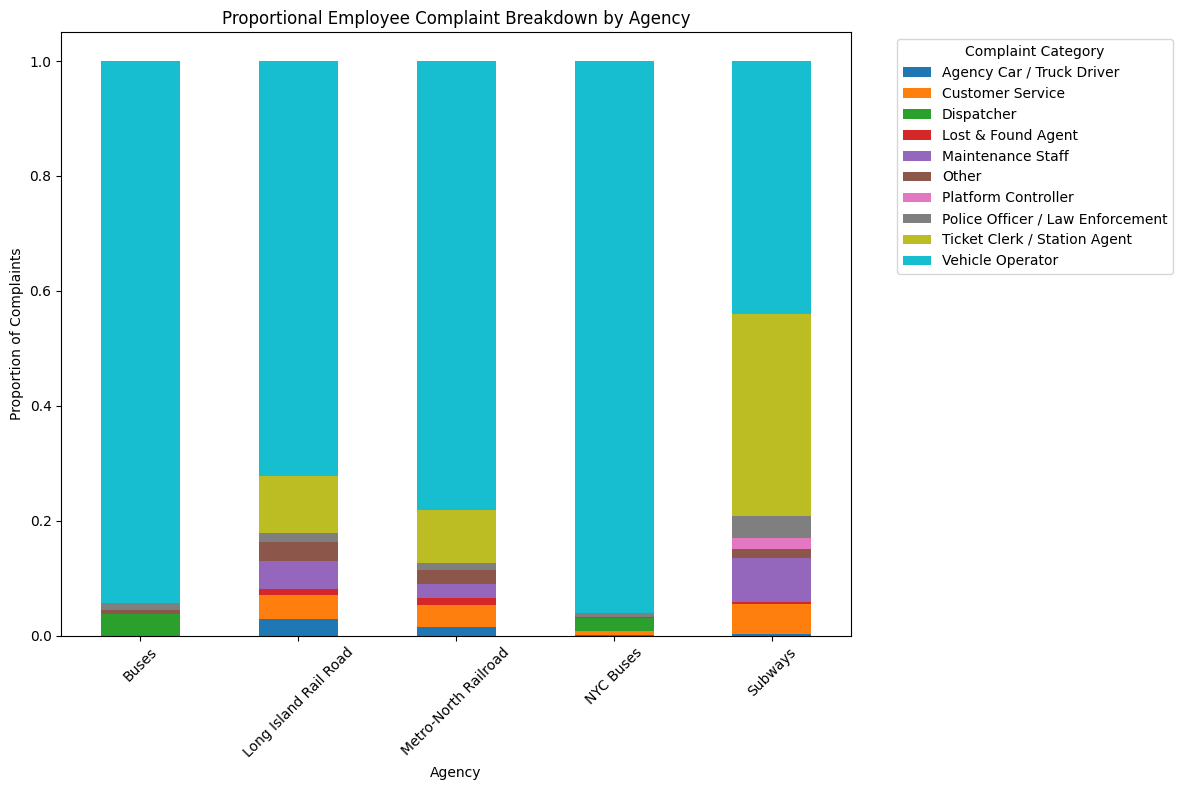

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('updated_dataset.csv')

# Filter complaints about employees
employee_complaints = data[
    (data['Commendation or Complaint'] == 'Complaint') &
    (data['Subject Matter'].str.contains('Employee', case=False, na=False))
]

# Group by agency and subject detail to calculate complaint counts
subject_complaints = employee_complaints.groupby(['Agency', 'Subject Detail']).size().reset_index(name='Count')

# Merge vehicle operating categories
subject_complaints['Subject Detail'] = subject_complaints['Subject Detail'].replace(
    {
        'Bus Operator / Driver': 'Vehicle Operator',
        'Train Conductor': 'Vehicle Operator',
        'Train Operator': 'Vehicle Operator',
        'Train Operator / Engineer': 'Vehicle Operator',
        'Substitute Bus Operator / Driver': 'Vehicle Operator'
    }
)

# Group all customer service categories
subject_complaints['Subject Detail'] = subject_complaints['Subject Detail'].apply(
    lambda x: 'Customer Service' if x.startswith('CSR ') else x
)

# Identify the 10 most common categories overall
top_10_categories = subject_complaints.groupby('Subject Detail')['Count'].sum().nlargest(10).index

# Group infrequent categories into "Other"
subject_complaints['Subject Detail'] = subject_complaints['Subject Detail'].apply(
    lambda x: x if x in top_10_categories else 'Other'
)

# Pivot data to create a table for the stacked bar chart
pivot_data = subject_complaints.pivot_table(
    index='Agency',
    columns='Subject Detail',
    values='Count',
    aggfunc='sum',
    fill_value=0
)

# Normalize data
pivot_data_normalized = pivot_data.div(pivot_data.sum(axis=1), axis=0)

pivot_data_normalized.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
)

# Plot results
plt.title('Proportional Employee Complaint Breakdown by Agency')
plt.xlabel('Agency')
plt.ylabel('Proportion of Complaints')
plt.xticks(rotation=45)
plt.legend(title='Complaint Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()
